In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from codigo.lda import lda_f
from matplotlib import pyplot as plt

np.set_printoptions(precision=4)

In [3]:
df = pd.read_csv("data/heart.csv", sep=",") 
scaler = MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)

## Reducción de dimensionalidad con aproximación QR a eigenvectores y eigenvalores

In [4]:
X_lda=lda_f(df=df,target="target",n_features=2,aprox_eigen=True,iterations=10000)

In [5]:
X_lda.head()

,0,1,target
0,-0.025377,0.762240,1.0
1,-0.147313,0.472544,1.0
2,0.157810,0.185379,1.0
3,0.053635,0.605643,1.0
4,-0.094121,0.440084,1.0


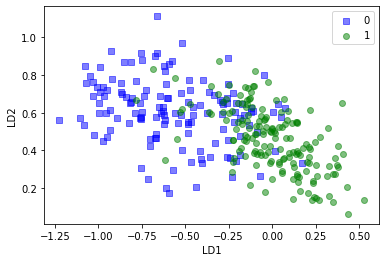

In [6]:
for label,marker,color in zip(range(0,2),('s', 'o'),('blue', 'green')):
    plt.scatter(
        x=X_lda[X_lda["target"]==label][0],
        y=X_lda[X_lda["target"]==label][1],
        marker=marker,
        color=color,
        alpha=0.5,
        label=label
    )
plt.xlabel('LD1')
plt.ylabel('LD2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## Reducción de dimensionalidad usando linalg.solve de numpy

In [7]:
X_lda=lda_f(df=df,target="target",n_features=2,aprox_eigen=False)

In [8]:
X_lda.head()

,0,1,target
0,-0.025377+0.000000j,0.049859+0.000000j,1.0
1,-0.147313+0.000000j,-0.222978+0.000000j,1.0
2,0.157810+0.000000j,-0.806553+0.000000j,1.0
3,0.053635+0.000000j,-0.600245+0.000000j,1.0
4,-0.094121+0.000000j,-0.885742+0.000000j,1.0


/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


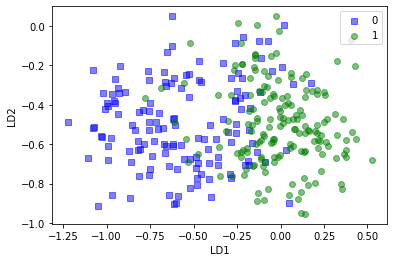

In [9]:
for label,marker,color in zip(range(0,2),('s', 'o'),('blue', 'green')):
    plt.scatter(
        x=X_lda[X_lda["target"]==label][0],
        y=X_lda[X_lda["target"]==label][1],
        marker=marker,
        color=color,
        alpha=0.5,
        label=label
    )
plt.xlabel('LD1')
plt.ylabel('LD2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## Error relativo

### Método QR

In [11]:
error_relativo=[]
for i in range(10,510,10):
    aprox=lda_f(df=df,target="target",n_features=2,aprox_eigen=True,iterations=i,shift=False)
    real=lda_f(df=df,target="target",n_features=2,aprox_eigen=False)
    error_relativo.append(np.linalg.norm(np.array(aprox[[0,1]])-np.array(real[[0,1]]),2)/np.linalg.norm(np.array(real[[0,1]]),2))    

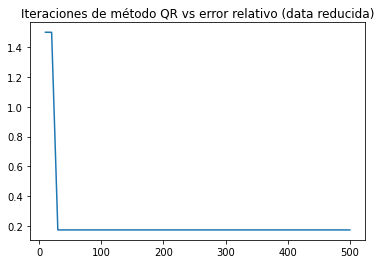

In [12]:
plt.plot(range(10,510,10),error_relativo)
plt.title("Iteraciones de método QR vs error relativo (data reducida)")
plt.show()

### Método QR con shift

In [18]:
error_relativo=[]
for i in range(10,510,10):
    aprox=lda_f(df=df,target="target",n_features=2,aprox_eigen=True,iterations=i,shift=True)
    real=lda_f(df=df,target="target",n_features=2,aprox_eigen=False)
    error_relativo.append(np.linalg.norm(np.array(aprox[[0,1]])-np.array(real[[0,1]]),2)/np.linalg.norm(np.array(real[[0,1]]),2))    

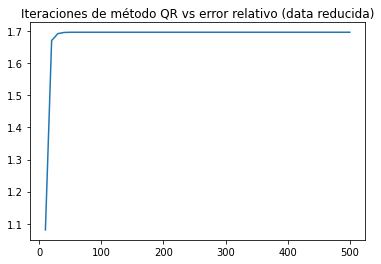

In [19]:
plt.plot(range(10,510,10),error_relativo)
plt.title("Iteraciones de método QR vs error relativo (data reducida)")
plt.show()